In [5]:
from typing import Tuple

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset

In [6]:
class TaskDataset(Dataset):
    def __init__(self, transform=None):
        self.ids = []
        self.imgs = []
        self.labels = []

        self.transform = transform

    def __getitem__(self, index) -> Tuple[int, torch.Tensor, int]:
        id_ = self.ids[index]
        img = self.imgs[index]
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return id_, img, label

    def __len__(self):
        return len(self.ids)

In [7]:
dataset = torch.load('Train.pt')

/var/folders/h6/ytvgvnbs57n5zl4bsrvxpzww0000gn/T/ipykernel_16328/3875401007.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load('Train.pt')


In [12]:
print(f"Images shape: {dataset.imgs[0].size}")
print(f"Number of unique labels: {len(set(dataset.labels))}")

Images shape: (32, 32)
Number of unique labels: 10


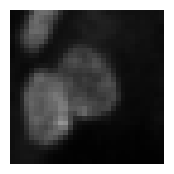

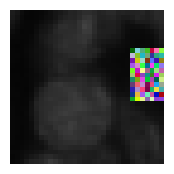

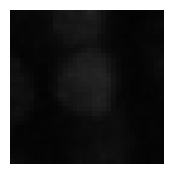

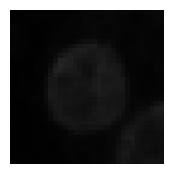

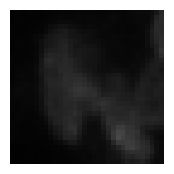

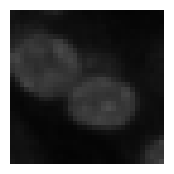

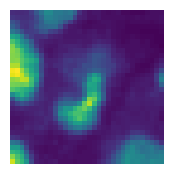

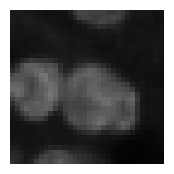

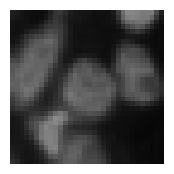

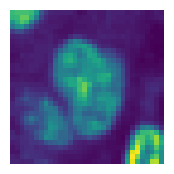

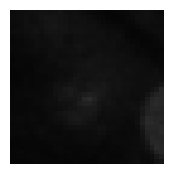

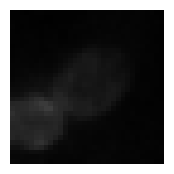

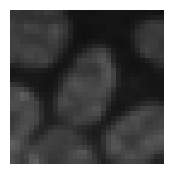

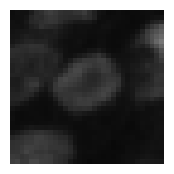

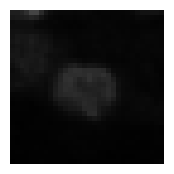

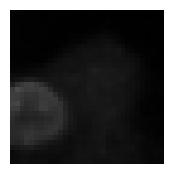

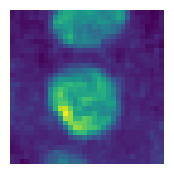

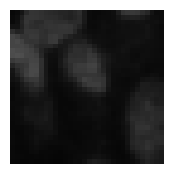

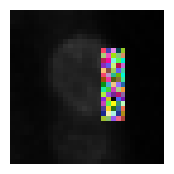

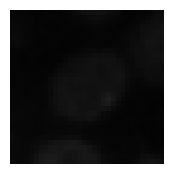

In [8]:
rand_idx = torch.randint(0, len(dataset), (20,))

for idx in rand_idx.tolist():
    obraz = dataset.imgs[idx]
    plt.figure(figsize=(2, 2))
    plt.imshow(obraz)
    plt.axis('off')
    plt.show()